In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)


data = pd.read_csv('foodcar_data.csv',parse_dates=['DATE'])
data.head()

,SELLER,CAT,ITEM_ID,ITEM_NAME,STORE,DATE,PRICE,QUANTITY,YEAR,HOLIDAY,WEEKEND,SCHOOLBREAK,AVG_TEMPERATURE
0,1070,0,2752,BURGER,1,2018-06-25,20.08,90,2012,New Year,1,0,24.8
1,2051,2,2752,BURGER,1,2018-06-25,16.54,42,2012,New Year,1,0,24.8
2,2051,2,4273,COKE,1,2018-06-25,16.54,42,2012,New Year,1,0,24.8
3,2052,2,2752,BURGER,1,2018-06-25,16.57,34,2012,New Year,1,0,24.8
4,2052,2,6249,WATER,1,2018-06-25,16.57,34,2012,New Year,1,0,24.8


In [2]:
data.drop(['ITEM_ID'],axis=1).describe()

,SELLER,CAT,STORE,PRICE,QUANTITY,YEAR,WEEKEND,SCHOOLBREAK,AVG_TEMPERATURE
count,10840.000000,10840.000000,10840.0,10840.000000,10840.000000,10840.000000,10840.000000,10840.00000,10840.000000
mean,1929.375000,1.750000,1.0,16.210829,77.856089,2013.373432,0.284133,0.20369,56.234244
std,324.829137,0.661468,0.0,1.698700,41.874907,1.070637,0.451021,0.40276,20.224510
min,1070.000000,0.000000,1.0,13.220000,14.000000,2012.000000,0.000000,0.00000,14.000000
25%,2051.000000,2.000000,1.0,14.950000,46.000000,2012.000000,0.000000,0.00000,35.600000
50%,2052.000000,2.000000,1.0,16.200000,66.000000,2013.000000,0.000000,0.00000,60.800000
75%,2053.000000,2.000000,1.0,16.700000,98.000000,2014.000000,1.000000,0.00000,75.200000
max,2053.000000,2.000000,1.0,21.350000,246.000000,2015.000000,1.000000,1.00000,87.800000


In [3]:
d = data[['SELLER','ITEM_ID','ITEM_NAME']].drop_duplicates()
print(d)

   SELLER  ITEM_ID ITEM_NAME
0    1070     2752    BURGER
1    2051     2752    BURGER
2    2051     4273      COKE
3    2052     2752    BURGER
4    2052     6249     WATER
5    2053     2752    BURGER
6    2053     4273      COKE
7    2053     3052    COFFEE


In [4]:
pd.concat([d.SELLER, pd.get_dummies(d.ITEM_NAME)], axis=1).groupby(d.SELLER).sum().reset_index(drop=True)

,SELLER,BURGER,COFFEE,COKE,WATER
0,1070,1,0,0,0
1,4102,1,0,1,0
2,4104,1,0,0,1
3,6159,1,1,1,0


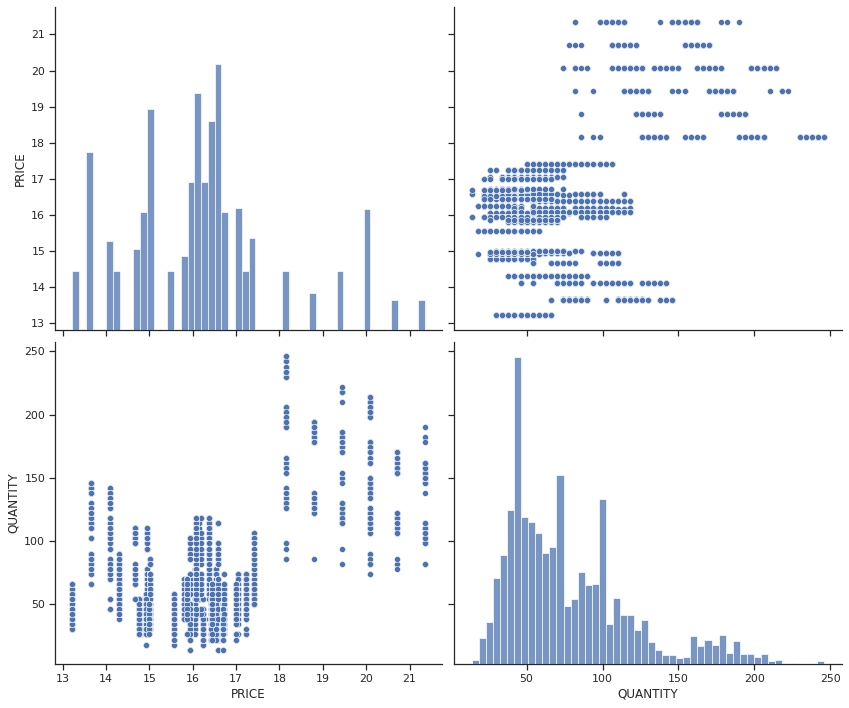

In [5]:
sns.pairplot(data[['PRICE','QUANTITY']],height=5,aspect=1.2)

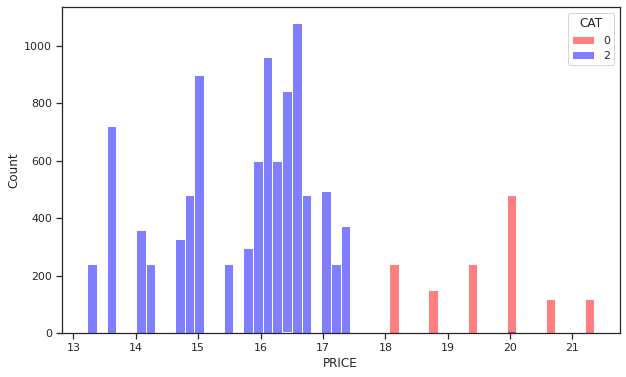

In [6]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.histplot(x='PRICE',data=data,hue='CAT',palette=['red','blue'])

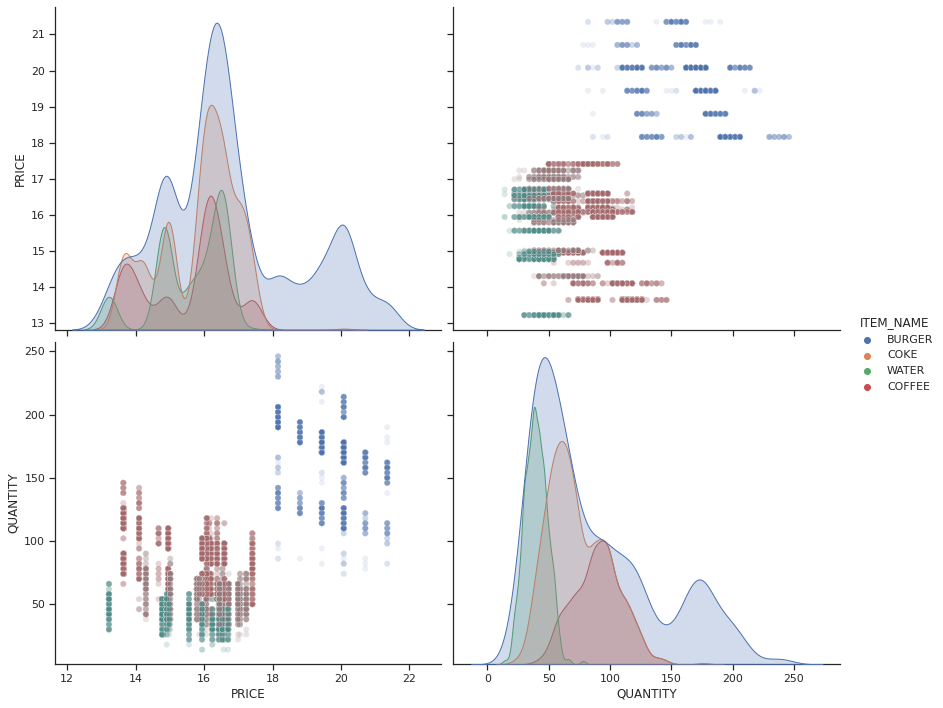

In [7]:
sns.pairplot(data[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1},height=5,aspect=1.2)

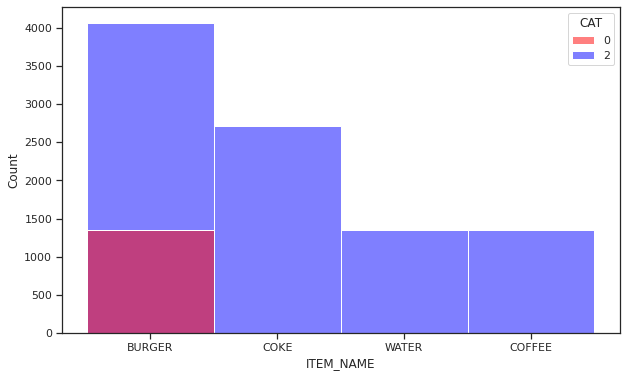

In [8]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.histplot(x='ITEM_NAME',data=data,hue='CAT',palette=['red','blue']

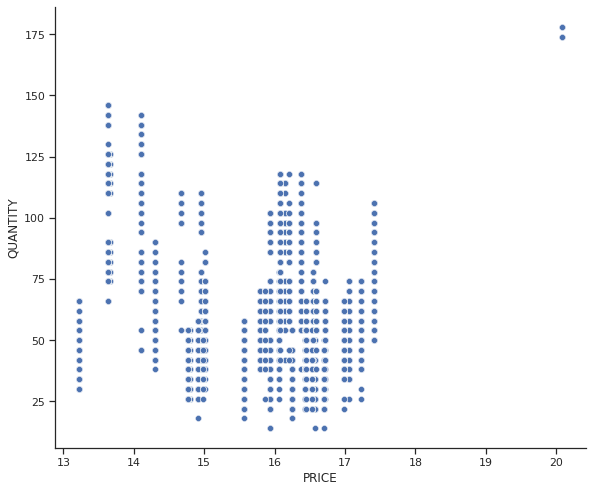

In [9]:
d = data[data['CAT']==2]
sns.relplot(x=d['PRICE'],y=d['QUANTITY'],height=7,aspect=1.2)

In [10]:
d = data[['DATE','PRICE','QUANTITY']].sort_values(['DATE'],ascending=True)
d['PRICE'] = (d['PRICE'] - d['PRICE'].mean())/((d['PRICE'].max() - d['PRICE'].min()))
d['QUANTITY'] = (d['QUANTITY'] - d['QUANTITY'].mean())/((d['QUANTITY'].max() - d['QUANTITY'].min()))

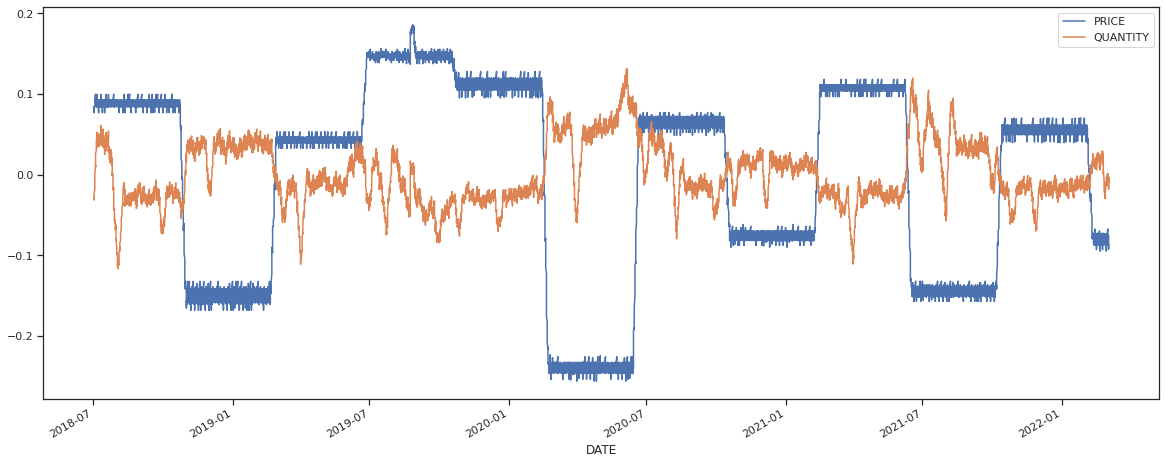

In [11]:
d.index = d['DATE'] 
d = d.drop(['DATE'],axis=1)
d.rolling(window=60).mean().plot(figsize=(20,8))

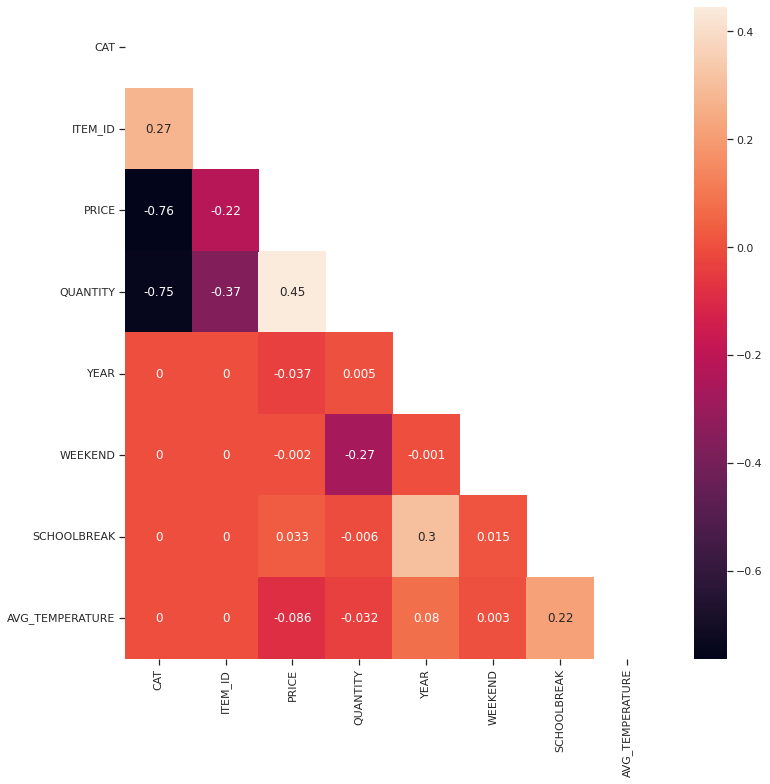

In [12]:
import numpy as np

df_corr = data.drop(['DATE','SELLER','STORE'],axis=1).corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
df_corr = df_corr.mask(mask).round(3)
fig, ax = plt.subplots(figsize=(12,12))    
sns.heatmap(df_corr, annot=True,ax=ax)

In [13]:
burger_2752 = data[data['ITEM_ID']==2752].drop(['ITEM_ID','ITEM_NAME'],axis=1)
burger_2752.head()

,SELLER,CAT,STORE,DATE,PRICE,QUANTITY,YEAR,HOLIDAY,WEEKEND,SCHOOLBREAK,AVG_TEMPERATURE
0,1070,0,1,2018-06-25,20.08,90,2012,New Year,1,0,24.8
1,2051,2,1,2018-06-25,16.54,42,2012,New Year,1,0,24.8
3,2052,2,1,2018-06-25,16.57,34,2012,New Year,1,0,24.8
5,2053,2,1,2018-06-25,16.38,58,2012,New Year,1,0,24.8
8,1070,0,1,2018-06-26,20.08,138,2012,New Year,0,0,24.8


In [14]:
model = ols("QUANTITY ~ PRICE", burger_2752).fit()

In [15]:
price_elasticity = model.params[1]
print("Price elasticity of the product: " + str(price_elasticity))
print(model.summary())

Price elasticity of the product: 16.11147227224823
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     3559.
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:48:34   Log-Likelihood:                -27634.
No. Observations:                5420   AIC:                         5.527e+04
Df Residuals:                    5418   BIC:                         5.529e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

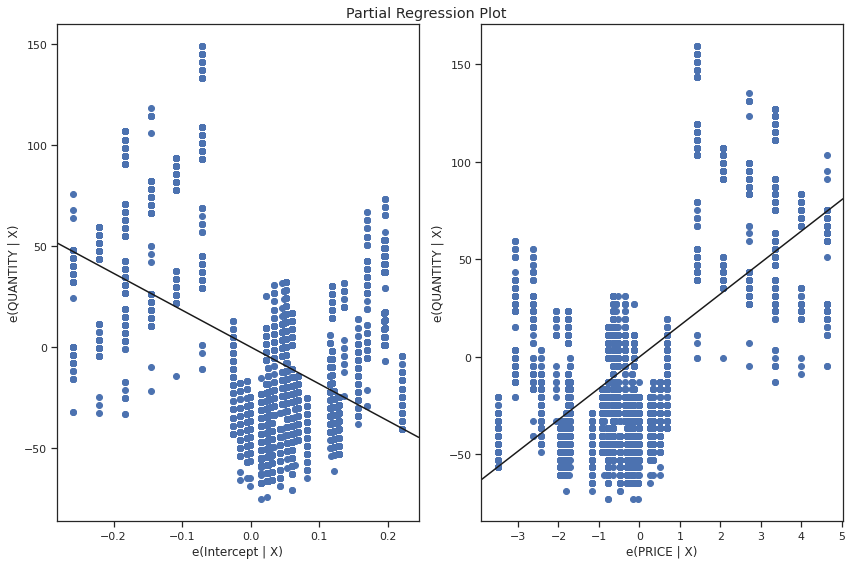

In [16]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

In [17]:
def create_model_and_find_elasticity(data):
    model = ols("QUANTITY ~ PRICE", data).fit()
    price_elasticity = model.params[1]
    print("Price elasticity of the product: " + str(price_elasticity))
    print(model.summary())
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    return price_elasticity, model

item_id 2752
Price elasticity of the product: 16.11147227224823
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     3559.
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:49:04   Log-Likelihood:                -27634.
No. Observations:                5420   AIC:                         5.527e+04
Df Residuals:                    5418   BIC:                         5.529e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

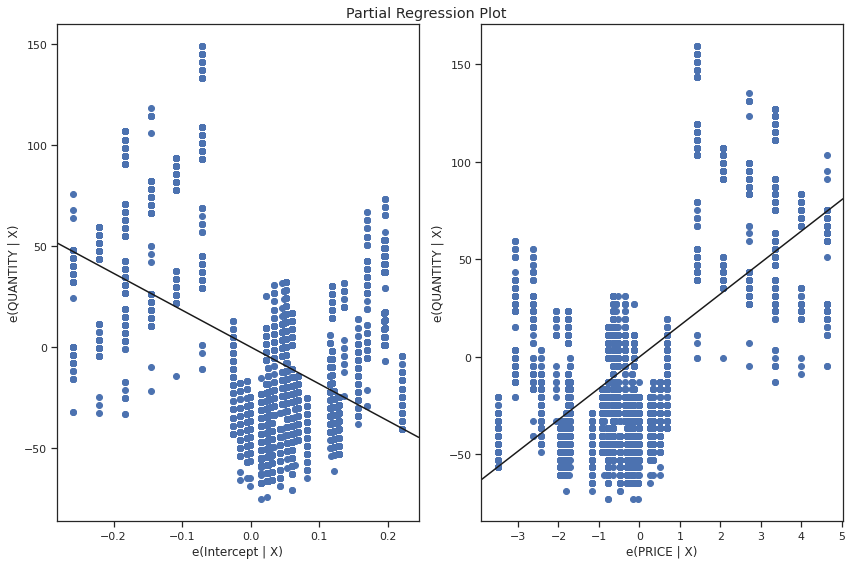

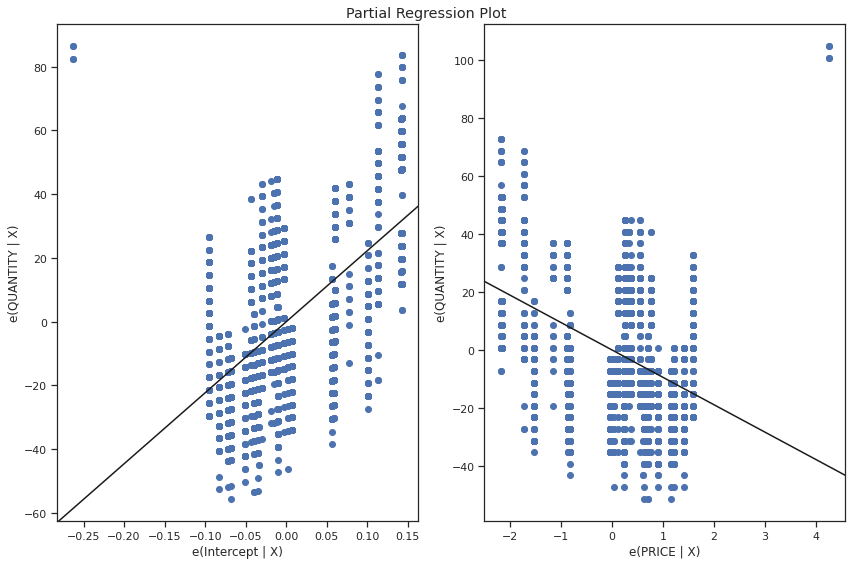

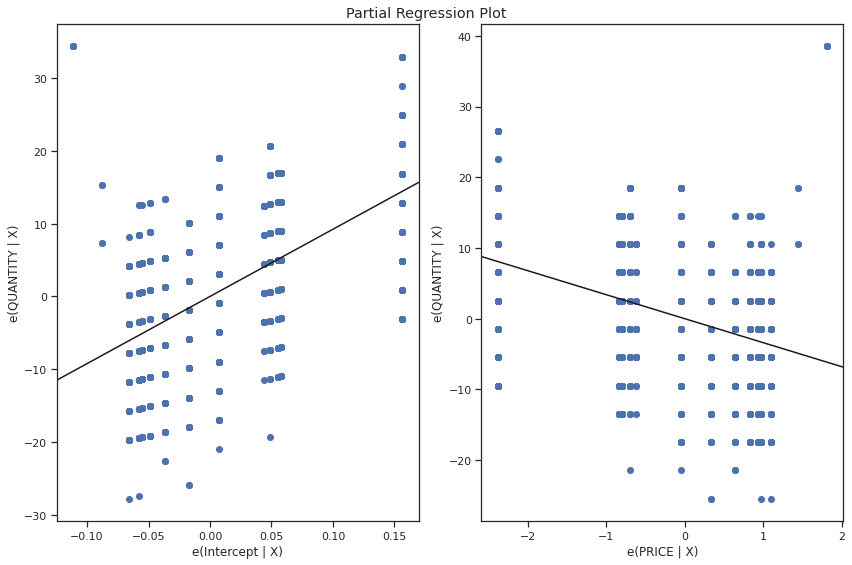

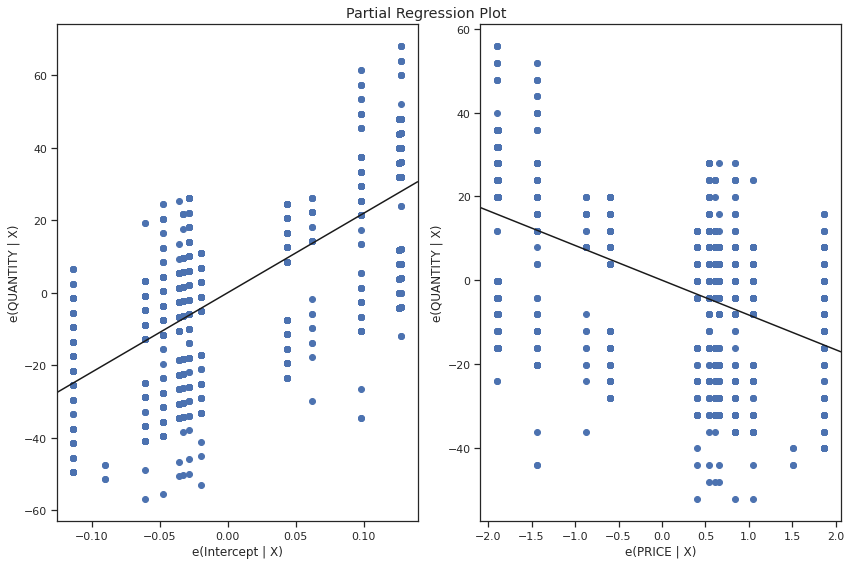

In [18]:
elasticities = {}
models = {}
for item_id in data['ITEM_ID'].unique():
  print('item_id',item_id)
  price_elasticity, item_model = create_model_and_find_elasticity(data[data['ITEM_ID']==item_id])
  elasticities[item_id] = price_elasticity
  models[item_id]= item_model

In [19]:
start_price = burger_2752.PRICE.min() - 1
end_price = burger_2752.PRICE.max() + 10
test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])
test['PRICE'] = np.arange(start_price, end_price,0.01)
test['QUANTITY'] = models[2752].predict(test['PRICE'])
test['REVENUE'] = test["PRICE"]  * test["QUANTITY"]
test.head()


,PRICE,QUANTITY,REVENUE
0,12.22,14.112284,172.452110
1,12.23,14.273399,174.563666
2,12.24,14.434513,176.678444
3,12.25,14.595628,178.796445
4,12.26,14.756743,180.917667


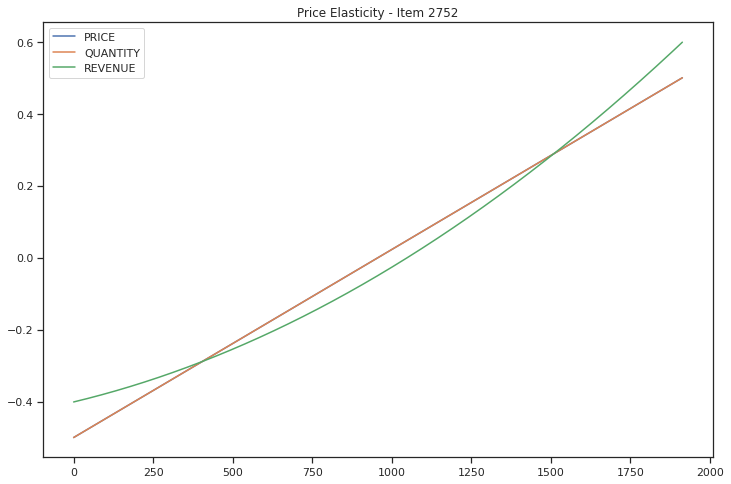

In [21]:
test['PRICE'] = (test['PRICE']-test['PRICE'].mean())/(test['PRICE'].max()-test['PRICE'].min())
test['QUANTITY'] = (test['QUANTITY']-test['QUANTITY'].mean())/(test['QUANTITY'].max()-test['QUANTITY'].min())
test['REVENUE'] = (test['REVENUE']-test['REVENUE'].mean())/(test['REVENUE'].max()-test['REVENUE'].min())
test.plot(figsize=(12,8),title='Price Elasticity - Item 2752')

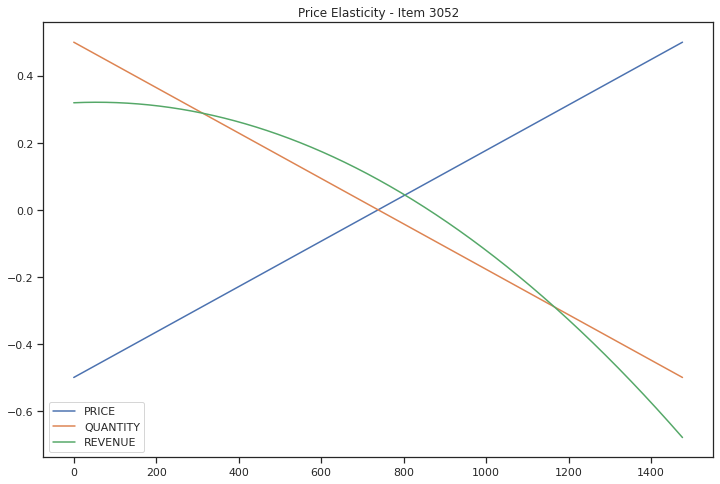

In [22]:
coffee_3052 = data[data['ITEM_ID']==3052]
start_price = coffee_3052.PRICE.min() - 1
end_price = coffee_3052.PRICE.max() + 10
test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])
test['PRICE'] = np.arange(start_price, end_price,0.01)
test['QUANTITY'] = models[3052].predict(test['PRICE'])
test['REVENUE'] = test["PRICE"]  * test["QUANTITY"]
test['PRICE'] = (test['PRICE']-test['PRICE'].mean())/(test['PRICE'].max()-test['PRICE'].min())
test['QUANTITY'] = (test['QUANTITY']-test['QUANTITY'].mean())/(test['QUANTITY'].max()-test['QUANTITY'].min())
test['REVENUE'] = (test['REVENUE']-test['REVENUE'].mean())/(test['REVENUE'].max()-test['REVENUE'].min())
test.plot(figsize=(12,8),title='Price Elasticity - Item 3052')

In [23]:
def find_optimal_price(data, model,item_id):
  start_price = data.PRICE.min() - 1
  end_price = data.PRICE.max() + 10
  test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])
  test['PRICE'] = np.arange(start_price, end_price,0.01)
  test['QUANTITY'] = model.predict(test['PRICE'])
  test['REVENUE'] = test["PRICE"] * test["QUANTITY"]
  test['P'] = (test['PRICE']-test['PRICE'].mean())/(test['PRICE'].max()-test['PRICE'].min())
  test['Q'] = (test['QUANTITY']-test['QUANTITY'].mean())/(test['QUANTITY'].max()-test['QUANTITY'].min())
  test['R'] = (test['REVENUE']-test['REVENUE'].mean())/(test['REVENUE'].max()-test['REVENUE'].min())
  test[['P','Q','R']].plot(figsize=(12,8),title='Price Elasticity - Item'+str(item_id))
  ind = np.where(test['REVENUE'] == test['REVENUE'].max())[0][0]
  values_at_max_profit = test.drop(['P','Q','R'],axis=1).iloc[[ind]]
  values_at_max_profit = {'PRICE':values_at_max_profit['PRICE'].values[0],'QUANTITY':values_at_max_profit['QUANTITY'].values[0],'REVENUE':values_at_max_profit['REVENUE'].values[0]}
  return values_at_max_profit

item_id 2752
item_id 4273
item_id 6249
item_id 3052


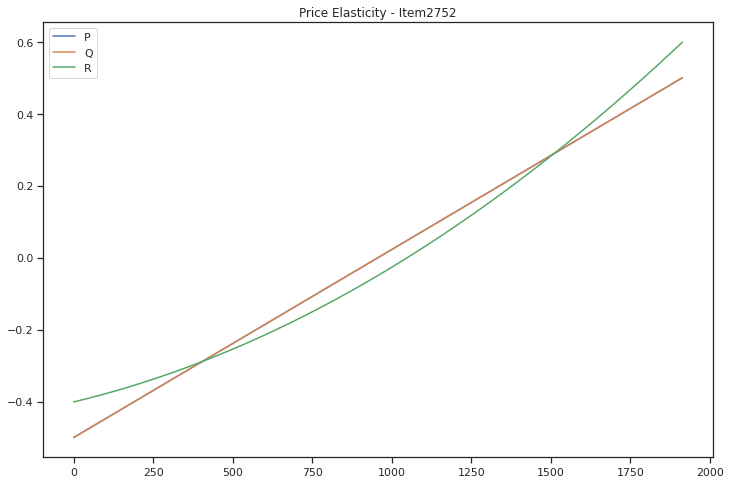

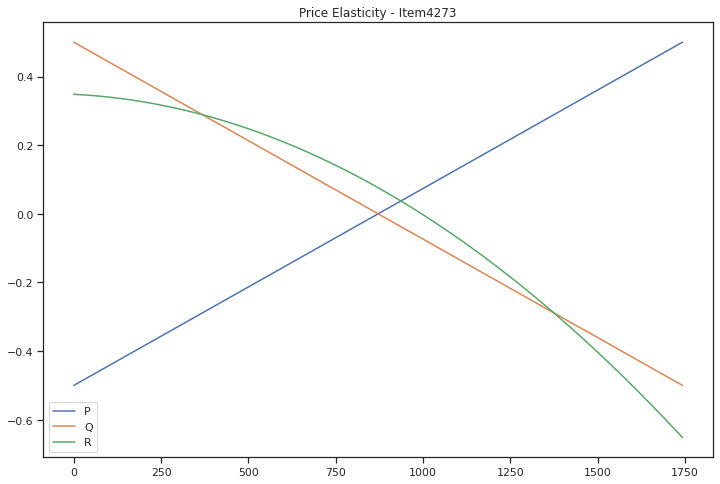

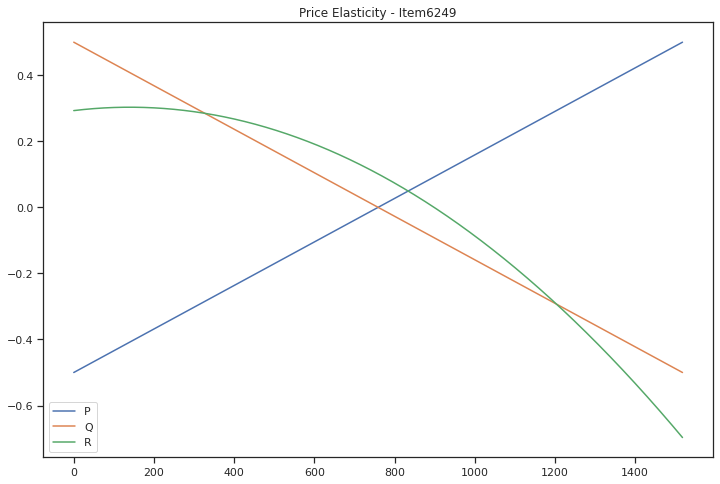

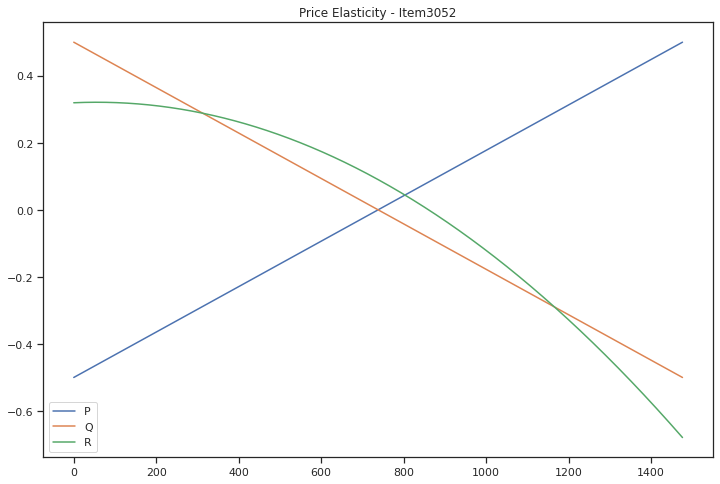

In [24]:
optimal_price = {}
for item_id in data['ITEM_ID'].unique():
  print('item_id',item_id)
  optimal_price[item_id] = find_optimal_price(data[data['ITEM_ID']==item_id], models[item_id],item_id)


In [25]:
for item_id in optimal_price:
  print(item_id,optimal_price[item_id])


2752 {'PRICE': 31.34999999999959, 'QUANTITY': 322.3247485303399, 'REVENUE': 10104.880866426023}
4273 {'PRICE': 12.64, 'QUANTITY': 103.35978051094523, 'REVENUE': 1306.4676256583477}
6249 {'PRICE': 13.61999999999997, 'QUANTITY': 46.184112609833626, 'REVENUE': 629.0276137459326}
3052 {'PRICE': 13.199999999999989, 'QUANTITY': 109.59320508662924, 'REVENUE': 1446.6303071435048}
